In [58]:
import numpy as np
import pandas as pd

In [59]:
df=pd.read_csv('new_data.csv',encoding='ISO-8859-1',)

In [60]:
df.head()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [61]:
df.isna().sum()

Rented Bike Count             0
Hour                          0
Temperature(Â°C)              0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(Â°C)    0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [64]:
le = LabelEncoder()

In [65]:
for i in df:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].astype(str))
    else:
        continue

In [66]:
x = df.drop(['Rented Bike Count'],axis=1)

In [67]:
y = df['Rented Bike Count'].values

In [68]:
df.fillna(0)

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
regr = RandomForestRegressor()

In [72]:
X_train = X_train.iloc[:3000]
y_train = y_train[:3000]

In [73]:
regr.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
y_pred = regr.predict(X_test)

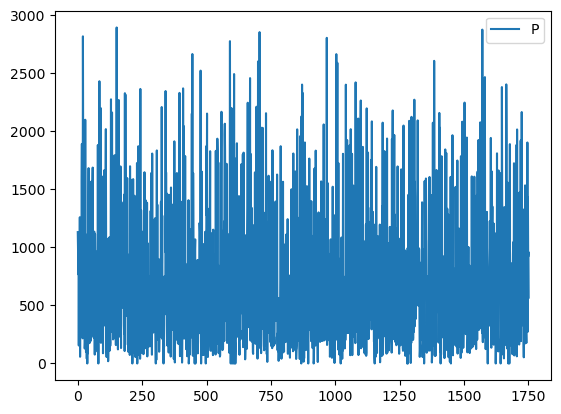

In [76]:
import matplotlib.pyplot as plt  # Import Matplotlib
plt.plot(y_pred)
plt.legend('Predicted Line')
plt.show()

In [77]:
r2_score(y_pred,y_test)

0.82426339544485

In [78]:
X_train.columns

Index(['Hour', 'Temperature(Â°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(Â°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [79]:
import joblib

In [80]:
joblib.dump(regr,'seoul_bike.pkl')

['seoul_bike.pkl']

In [26]:
df.to_csv('new_data.csv')

In [27]:
model=pickle.load(open("seoul_bike.pkl",'rb'))

In [28]:
print(model.predict([[10,10,60,3,1000,0,0,2,12,1]])[0])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but RandomForestRegressor is expecting 13 features as input.